In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from datetime import datetime
from matplotlib.pylab import rcParams

In [2]:
df = pd.read_excel("statistic_id12761_umsatz-mit-apple-iphones-weltweit-nach-quartalen-bis-q1-2021.xlsx",  sheet_name = "Daten")


In [3]:
df['Period'] = df['Period'].str.split(" ").apply(lambda x: '-'.join(x[::-1]))
df['Period'] = df['Period'].apply(lambda x: x.replace("'", "").replace("*", "")) 
df['Period'] = pd.PeriodIndex(df.Period, freq='Q')


In [72]:
df

,Period,Umsatz,MonthNumberOrdinial
0,2007Q3,5,719163
1,2007Q4,118,719163
2,2008Q1,241,719163
3,2008Q2,378,719163
4,2008Q3,419,719163
5,2008Q4,806,719163
6,2009Q1,2940,719163
7,2009Q2,2427,719163
8,2009Q3,3060,719163
9,2009Q4,4606,719163


In [32]:
train_date = df[:44]
test_date = df[44:]
# X = df['Period'].values
# Y = df['Umsatz']
# X_train, X_test, y_train, y_test = train_test_split(
#         X, Y, test_size=0.2, shuffle=False
#     )
# X_train.shape

In [39]:

train_date["MonthNumberOrdinial"] = train_date
train_date["MonthNumberOrdinial"] = pd.to_datetime(train_date["MonthNumberOrdinial"]).map(datetime.toordinal)

test_date["MonthNumberOrdinial"] = test_date
test_date["MonthNumberOrdinial"] = pd.to_datetime(test_date["MonthNumberOrdinial"]).map(datetime.toordinal)

<ipython-input-39-82bb9fd20183>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_date["MonthNumberOrdinial"] = train_date
<ipython-input-39-82bb9fd20183>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_date["MonthNumberOrdinial"] = pd.to_datetime(train_date["MonthNumberOrdinial"]).map(datetime.toordinal)
<ipython-input-39-82bb9fd20183>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [40]:
test_date

,Period,Umsatz,MonthNumberOrdinial
44,18-Q3,29470,736876
45,18-Q4,36755,736968
46,19-Q1,51982,737060
47,19-Q2,31051,737150
48,19-Q3,25986,737241
49,19-Q4,33362,737333
50,20-Q1,55957,737425
51,20-Q2,28962,737516
52,20-Q3,26418,737607
53,20-Q4,26444,737699


In [55]:
reg = LinearRegression()
reg.fit(train_date["MonthNumberOrdinial"].values.reshape(-1, 1), train_date["Umsatz"].values)
prediction = reg.predict(test_date["MonthNumberOrdinial"].values.reshape(-1, 1))
prediction1  = pd.DataFrame(prediction, index = test_date["Period"], columns = ["Forecast"])
# result = pd.DataFrame(y_test)



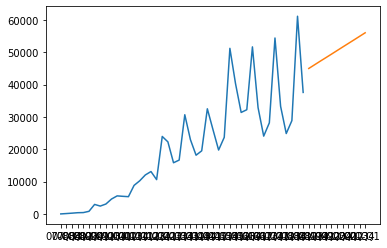

In [69]:
actuals = pd.DataFrame(train_date["Umsatz"].values, index = train_date["Period"], columns = ["Actuals"])
plt.plot(actuals)
plt.plot(prediction1)
